<a href="https://colab.research.google.com/github/albertofernandezvillan/ml-dl-cv-notebooks/blob/main/min_max_normalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import sklearn
# import sklearn_pandas

**Load data** and split the dataset into train (80%), test (10%) and val (10%).

In [8]:
# Load iris dataset (multi-class classification: 150 samples, 3 classes, 4 features):
x,y = sklearn.datasets.load_iris(return_X_y = True)

In [ ]:
# Split dataset into train (80%), test (10%) and val (10%)
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.2, random_state=123)
x_test, x_val, y_test, y_val = sklearn.model_selection.train_test_split(x_test, y_test, test_size=0.5, random_state=123)

print("x_train {}, x_test {}, x_val {}".format(x_train.shape, x_test.shape, x_val.shape))
print("y_train {}, y_test {}, y_val {}".format(y_train.shape, y_test.shape, y_val.shape))
print("Show first examples")
print(x_train[:10,:])
print(y_train[:10])

**Min-Max normalization**: all features will be transformed into the range `[0,1]` meaning that the minimum and maximum value of a feature/variable is going to be `0` and `1`, respectively.

In [83]:
import numpy as np

# min-max normalization
# All features will be transformed into the range [0,1] 
def min_max_normalization(arr):
  min_val = np.min(arr, axis=0)
  max_val = np.max(arr, axis=0)
  arr_normalized = (arr - min_val) / (max_val - min_val)
  return arr_normalized

In [81]:
data = x_train[:3,:]
print(data)

[[7.4 2.8 6.1 1.9]
 [6.  2.2 5.  1.5]
 [4.7 3.2 1.6 0.2]]


In [82]:
normalized_data = min_max_normalization(data)
print(normalized_data)

[[1.         0.6        1.         1.        ]
 [0.48148148 0.         0.75555556 0.76470588]
 [0.         1.         0.         0.        ]]


Note that we can use [MinMaxScaler()](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html). 

In [75]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(data)
scaled = scaler.transform(data)
print(scaled)

[[1.         0.6        1.         1.        ]
 [0.48148148 0.         0.75555556 0.76470588]
 [0.         1.         0.         0.        ]]


In [76]:
print(scaler.data_max_)
print(scaler.data_min_)
print(scaler.data_range_)

[7.4 3.2 6.1 1.9]
[4.7 2.2 1.6 0.2]
[2.7 1.  4.5 1.7]


Once tested that our function `min_max_normalization()` works like expected, we can normalize all the data. But before, **we should calculate the global max and global min for the entire dataset** to take into account these values when normalizing the data.

In [84]:
global_min = np.min(x, axis=0)
global_max = np.max(x, axis=0)
print(global_min)
print(global_max)

[4.3 2.  1.  0.1]
[7.9 4.4 6.9 2.5]


In [86]:
import numpy as np

# min-max normalization
# All features will be transformed into the range [0,1] 
def min_max_norm(arr, g_min, g_max):
  arr_normalized = (arr - g_min) / (g_max - g_min)
  return arr_normalized

In [87]:
x_train_scaled = min_max_norm(x_train, global_min, global_max)
x_test_scaled = min_max_norm(x_test, global_min, global_max)
x_val_scaled = min_max_norm(x_val, global_min, global_max)

In [88]:
print(x_train_scaled[:10,:])

[[0.86111111 0.33333333 0.86440678 0.75      ]
 [0.47222222 0.08333333 0.6779661  0.58333333]
 [0.11111111 0.5        0.10169492 0.04166667]
 [0.22222222 0.625      0.06779661 0.04166667]
 [0.47222222 0.08333333 0.50847458 0.375     ]
 [0.19444444 0.125      0.38983051 0.375     ]
 [1.         0.75       0.91525424 0.79166667]
 [0.30555556 0.79166667 0.11864407 0.125     ]
 [0.30555556 0.79166667 0.05084746 0.125     ]
 [0.41666667 0.29166667 0.49152542 0.45833333]]


In [89]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Compute the minimum and maximum to be used for later scaling.
scaler.fit(x)
# Scale the features:
scaled = scaler.transform(x_train)
print(scaled[:10,:])

[[0.86111111 0.33333333 0.86440678 0.75      ]
 [0.47222222 0.08333333 0.6779661  0.58333333]
 [0.11111111 0.5        0.10169492 0.04166667]
 [0.22222222 0.625      0.06779661 0.04166667]
 [0.47222222 0.08333333 0.50847458 0.375     ]
 [0.19444444 0.125      0.38983051 0.375     ]
 [1.         0.75       0.91525424 0.79166667]
 [0.30555556 0.79166667 0.11864407 0.125     ]
 [0.30555556 0.79166667 0.05084746 0.125     ]
 [0.41666667 0.29166667 0.49152542 0.45833333]]


In [91]:
# Verify manually vs scikit-learn estimation
print(np.allclose(x_train_scaled, scaled)) # This should return True

True


**The effect of the transform in a visual example**.
We plot the first two features for all the training data (before and after normalization). Moreover, the data is shown in three different colors because there are three classes in our dataset. 

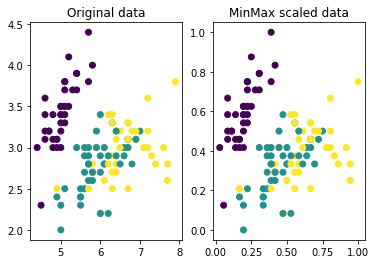

In [101]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1,2)

axes[0].scatter(x_train[:,0], x_train[:,1], c=y_train)
axes[0].set_title("Original data")

axes[1].scatter(x_train_scaled[:,0], x_train_scaled[:,1], c=y_train)

axes[1].set_title("MinMax scaled data")
plt.show()

At this point, we have min-max normalized our dataset and shown the effect of the transformation.

**K-Folds cross-validator**: Provides train/test indices to split data in train/test sets. Split dataset into `k` consecutive folds (without shuffling by default). Each fold is then used once as a validation while the `k - 1` remaining folds form the training set.

In [117]:
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [111]:
kfold = KFold()

In [113]:
x_train_test_scaled = np.concatenate((x_train_scaled, x_test_scaled), axis=0)
y_train_test = np.concatenate((y_train, y_test), axis=0)

In [118]:
accuracies = []
for index_train, index_test in kfold.split(x_train_test_scaled):
  _x_train = x_train_test_scaled[index_train]
  _x_test = x_train_test_scaled[index_test]

  _y_train = y_train_test[index_train]
  _y_test = y_train_test[index_test]

  clf = SVC()
  clf.fit(_x_train, _y_train)

  predictions = clf.predict(_x_test)

  accuracies.append(accuracy_score(_y_test, predictions))

In [119]:
print(accuracies)

[0.9629629629629629, 1.0, 0.8888888888888888, 1.0, 0.9629629629629629]


References:
* https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/
* https://interactivechaos.com/es/manual/tutorial-de-machine-learning/minmaxscaler
* https://towardsdatascience.com/everything-you-need-to-know-about-min-max-normalization-in-python-b79592732b79